# Quantitative analysis using pynance and TaLib


### Import Libraries

In [2]:
import os
import sys
import talib
import matplotlib.pyplot as plt
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [3]:
from scripts.data_loader import load_data
from scripts.data_analysis import calculate_moving_average
from scripts.data_visualization import plot_stock_data
from scripts.data_visualization import plot_univariate
from scripts.data_visualization import plot_bivariate


### Data Loading


1. AAPL DATASET

In [ ]:
data_AAPL = load_data(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AAPL_historical_data.csv")
data_AAPL.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0


2. AMZN Dataset

In [5]:
data_AMZN = load_data(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AMZN_historical_data.csv")
data_AMZN.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0


3. GOOG DATASET

In [6]:
data_GOOG = load_data(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\GOOG_historical_data.csv")
data_GOOG.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0


4. META DATASET

In [7]:
data_META = load_data(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\META_historical_data.csv")
data_META.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.00,28.139999,27.370001,27.58,27.523441,46704200,0.0,0.0
1,2012-12-13,27.59,28.750000,27.430000,28.24,28.182087,81051600,0.0,0.0


5. MSFT DATASET

In [8]:
data_MSFT = load_data(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\MSFT_historical_data.csv")
data_MSFT.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0


6. NVDA DATASET

In [9]:
data_NVDA = load_data(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\NVDA_historical_data.csv")
data_NVDA.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0


7. TSLA DATASET

In [10]:
data_TSLA = load_data(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\TSLA_historical_data.csv")
data_TSLA.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0


## EDA ANALYSIS

 Dataset Information

In [11]:
datasets = [data_AAPL, data_AMZN, data_GOOG, data_MSFT, data_NVDA, data_TSLA, data_META]

# Loop through the list and display info
for i, data in enumerate(datasets, start=1):
    print(f"Info for Dataset {i}:")
    data.info()
    print("\n" + "-" * 50 + "\n")


Info for Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB

--------------------------------------------------

Info for Dataset 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non

 Checking and Handling Missing Values


In [17]:
# List of datasets
datasets = [data_AAPL, data_AMZN, data_GOOG, data_MSFT, data_NVDA, data_TSLA, data_META]

# Corresponding dataset names (for output clarity)
dataset_names = ["AAPL", "AMZN", "GOOG", "MSFT", "NVDA", "TSLA", "META"]

# Loop through datasets with enumerate
for i, data in enumerate(datasets):
    print(f"Checking missing values for {dataset_names[i]}:")
    
    # Check for missing values
    missing_count = data.isnull().sum().sum()  # Total number of missing values
    if missing_count > 0:
        print(f" - Missing values found: {missing_count}")
        data.dropna(inplace=True)  # Drop rows with missing values
        print(f" - Missing values dropped.")
    else:
        print(f" - No missing values.")
    
    print(  "-" * 50  )


Checking missing values for AAPL:
 - No missing values.
--------------------------------------------------
Checking missing values for AMZN:
 - No missing values.
--------------------------------------------------
Checking missing values for GOOG:
 - No missing values.
--------------------------------------------------
Checking missing values for MSFT:
 - No missing values.
--------------------------------------------------
Checking missing values for NVDA:
 - No missing values.
--------------------------------------------------
Checking missing values for TSLA:
 - No missing values.
--------------------------------------------------
Checking missing values for META:
 - No missing values.
--------------------------------------------------


### Descriptive Statistics

In [18]:
# List of datasets
datasets = [data_AAPL, data_AMZN, data_GOOG, data_MSFT, data_NVDA, data_TSLA, data_META]

# Corresponding dataset names
dataset_names = ["AAPL", "AMZN", "GOOG", "MSFT", "NVDA", "TSLA", "META"]

# Loop through datasets and perform .describe()
for i, data in enumerate(datasets):
    print(f"Descriptive Statistics for {dataset_names[i]}:")
    print(data.describe())  # Perform .describe() for each dataset
    print("\n" + "-" * 50 + "\n")


Descriptive Statistics for AAPL:
               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10998.000000  10998.000000  
mean   3.180806e+08      0.000752      0.001546  
std    3.354523e+08      0.011753      0.083663  
min    0.000000e+00      0.000000      0.000000  
25%  

###Data v

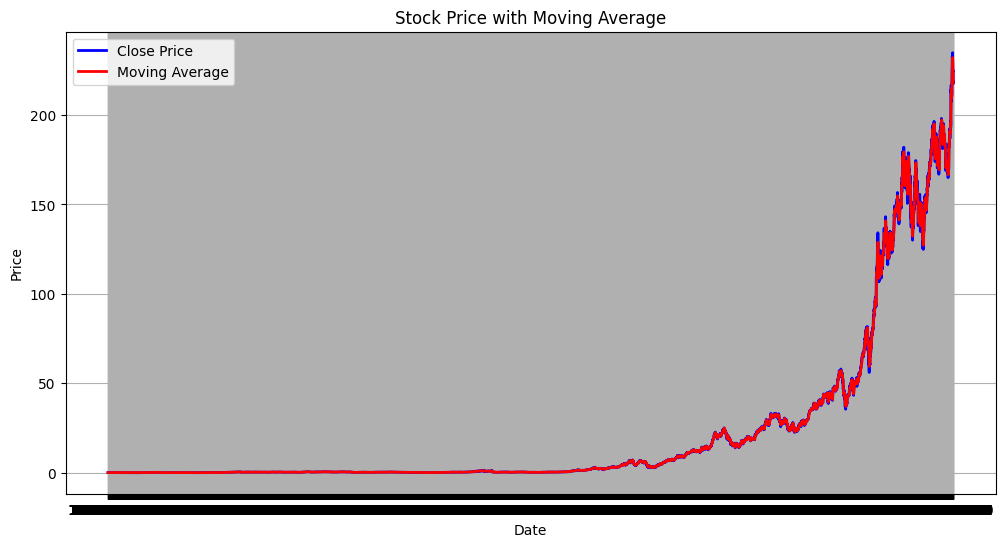

In [11]:
data["Moving Average"] = calculate_moving_average(data['Close'], window=5)
plot_stock_data(data)

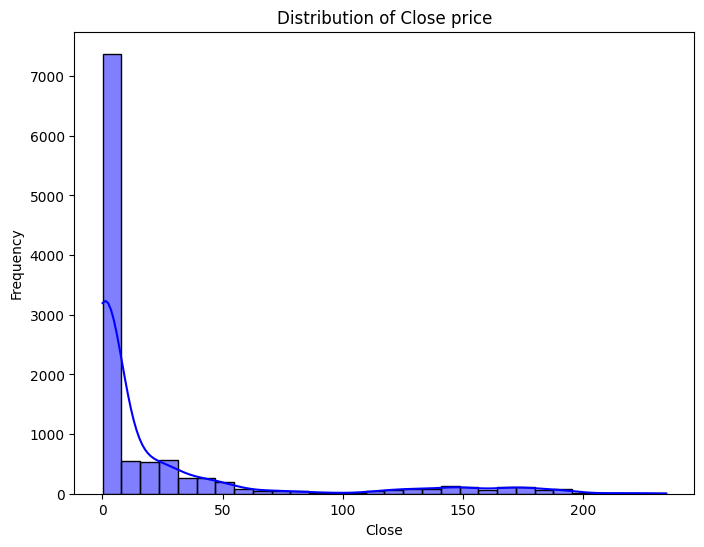

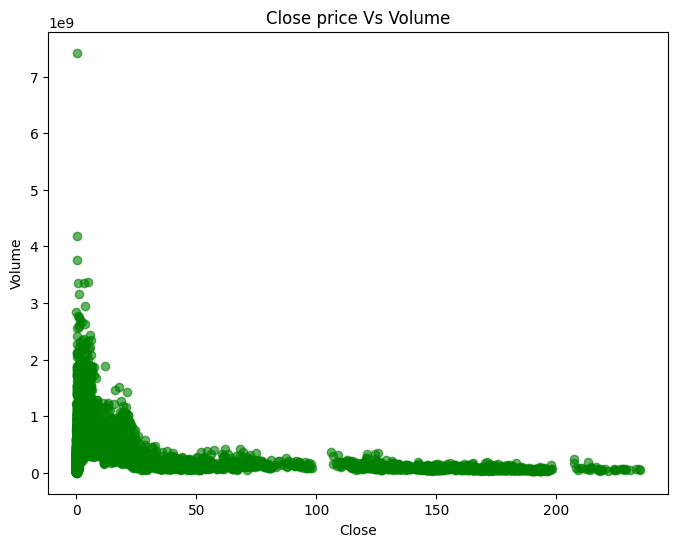

In [14]:
plot_univariate(data, 'Close', title="Distribution of Close price")
plot_bivariate(data, 'Close', 'Volume', title="Close price Vs Volume")

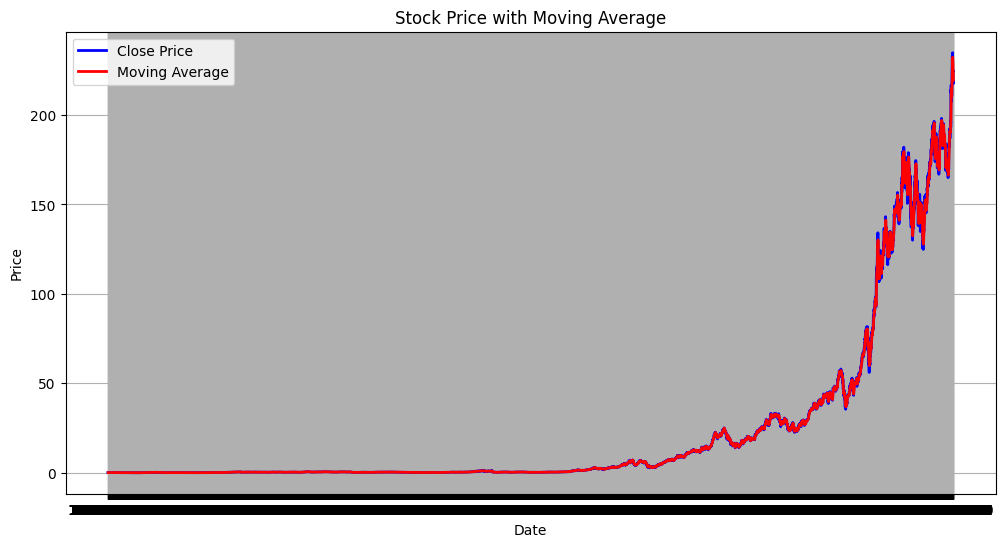

In [15]:
data["Moving Average"] = calculate_moving_average(data['Open'], window=5)
plot_stock_data(data)

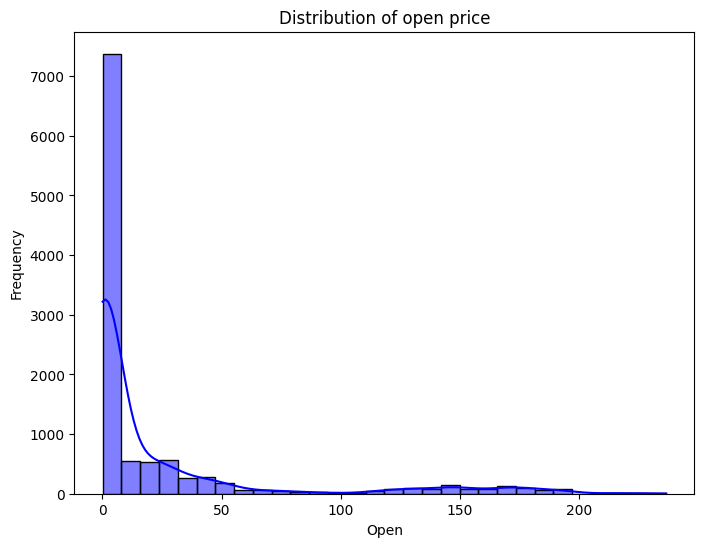

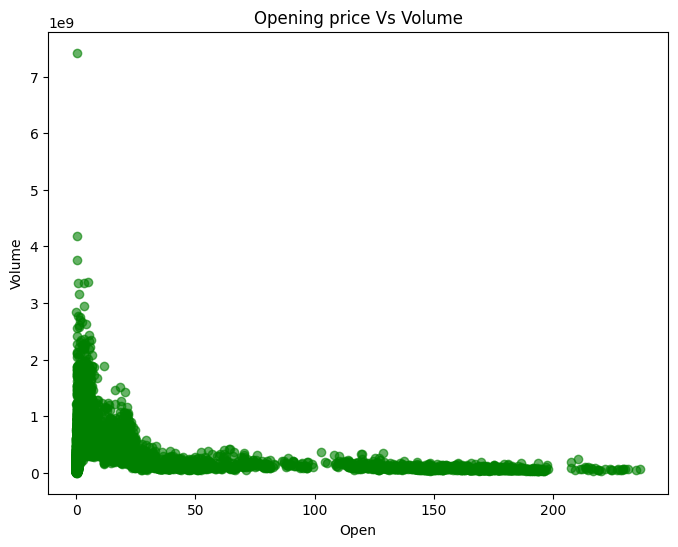

In [13]:
plot_univariate(data, 'Open', title="Distribution of open price")
plot_bivariate(data, 'Open', 'Volume', title="Opening price Vs Volume")


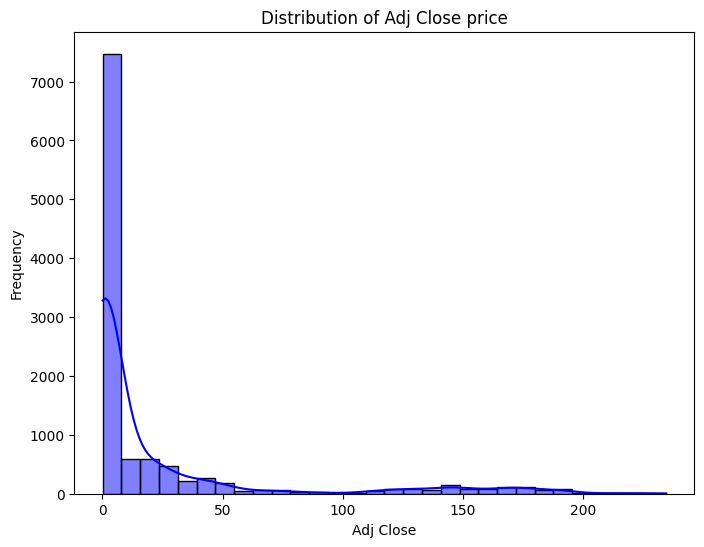

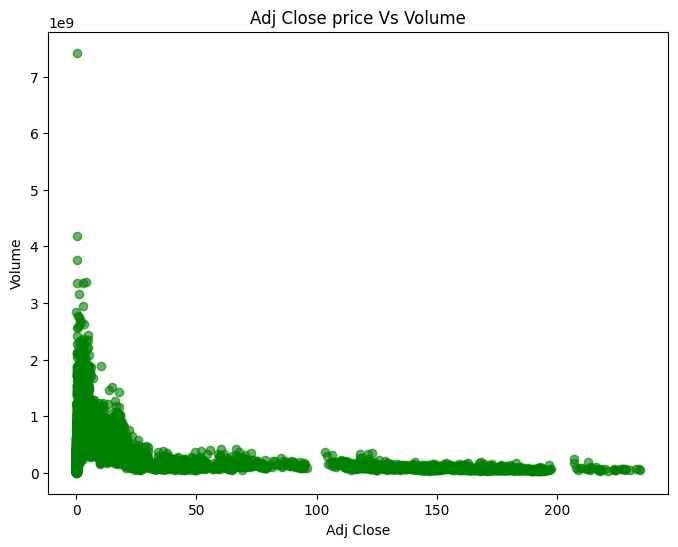

In [16]:
plot_univariate(data, 'Adj Close', title="Distribution of Adj Close price")
plot_bivariate(data, 'Adj Close', 'Volume', title="Adj Close price Vs Volume")

 ## Apply Analysis Indicators with TA-Lib

### Moving averages

In [6]:
sma = talib.SMA(data['Close'], timeperiod=3)
print(sma)


0               NaN
1               NaN
2          0.120908
3          0.116629
4          0.115699
            ...    
10993    222.503332
10994    220.346664
10995    217.996668
10996    217.896673
10997    218.333338
Length: 10998, dtype: float64


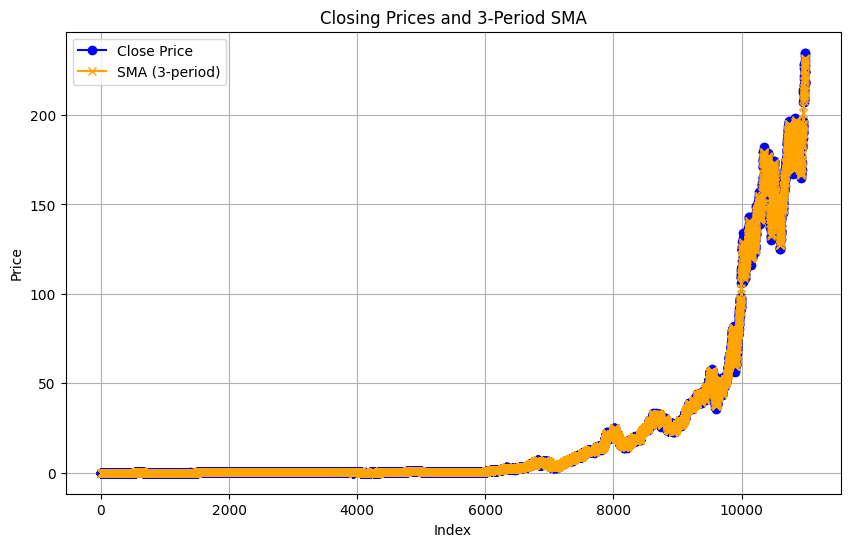

In [10]:
sma = talib.SMA(data['Close'], timeperiod=5)
data['SMA'] = sma  # Add the SMA to the DataFrame

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue', marker='o')
plt.plot(data.index, data['SMA'], label='SMA (3-period)', color='orange', marker='x')

# Add labels, title, and legend
plt.title('Closing Prices and 3-Period SMA')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

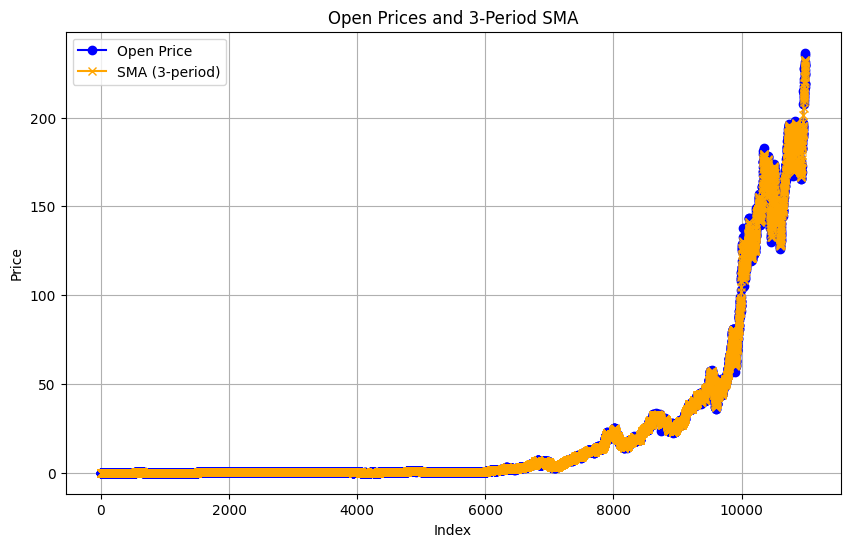

In [11]:
sma = talib.SMA(data['Open'], timeperiod=5)
data['SMA'] = sma  # Add the SMA to the DataFrame

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Open'], label='Open Price', color='blue', marker='o')
plt.plot(data.index, data['SMA'], label='SMA (3-period)', color='orange', marker='x')

# Add labels, title, and legend
plt.title('Open Prices and 3-Period SMA')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()